In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

from keras.utils import to_categorical

In [2]:
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])

Y = np.array([0,1,1,0])

In [3]:
X.shape

(4, 2)

In [4]:
Y.shape

(4,)

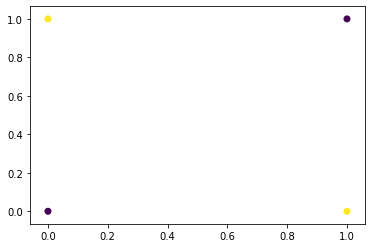

In [5]:
plt.scatter(X[:, 0], X[:, 1], c= Y)
plt.show()

In [6]:
input_shape = 2
layers = [4, 3]
output_size = 2
EPOCHS = 50

In [18]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea, axis = 1).reshape(-1, 1)

In [19]:
a = np.array([[5,10], 
             [20, 20]])

In [20]:
a

array([[ 5, 10],
       [20, 20]])

In [21]:
softmax(a)

array([[0.00669285, 0.99330715],
       [0.5       , 0.5       ]])

In [29]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
#         np.random.seed(0)
        model = {}
    
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0] ))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1] ))
        
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size ))
        
        self.model = model
        
        
    def forward(self, X):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        
        Z1 = np.dot(X, W1) + b1
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1, W2) + b2
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2, W3) + b3
        A3 = softmax(Z3)
        
        # storing my activation units of each layer
        self.activation_units = (A1, A2, A3)
        
        return A3
        
        
    
    def backward(self, X, Y, learning_rate = 0.001):
        
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        A1, A2, A3 = self.activation_units
        
        
        
        dZ3 = (A3 - Y)
        
        dW3 = np.dot(A2.T, dZ3)
        db3 = np.sum(dZ3, axis = 0)
        
        
        dZ2 =  (1 - np.square(A2)) * np.dot(dZ3, W3.T)
        
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis =0)
        
        
        dZ1 =  (1 - np.square(A1)) * np.dot(dZ2, W2.T)
        
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis =0)
        
        
        
        self.model['W1'] -= learning_rate*dW1
        self.model['W2'] -= learning_rate*dW2
        self.model['W3'] -= learning_rate*dW3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    
    def predict(self, X):
        y_out = self.forward(X)
        return np.argmax(y_out, axis = 1)
    
    
    def summary(self):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        A1, A2, A3 = self.activation_units
        
        
        print("W1 ", W1.shape)
        print("W2 ", W2.shape)
        print("W3 ", W3.shape)
        
        print("b1 ", b1.shape)
        print("b2 ", b2.shape)
        print("b3 ", b3.shape)  
        
        print("A1 ", A1.shape)
        print("A2 ", A2.shape)
        print("A3 ", A3.shape) 
        
        
    def loss(self, y_oht, p):
        l = -np.mean(y_oht*np.log(p))
        return l
        
    def train(self, X, Y, epochs):
        
        training_loss = []
        
        Y_OHT = to_categorical(Y)
        
        
        for i in range(epochs):
            Y_ = self.forward(X)
            l = self.loss(Y_OHT, Y_ )
            
            self.backward(X, Y_OHT)
            
            training_loss.append(l)
            
            print("Loss value : ", l)

In [30]:
model = NeuralNetwork(input_size=2, layers=[4,3], output_size = 2)

In [31]:
model.train(X, Y, 1000)

Loss value :  0.5968186215533414
Loss value :  0.5930924418799827
Loss value :  0.5894215752684964
Loss value :  0.5858032871713375
Loss value :  0.5822349443234742
Loss value :  0.5787140207049155
Loss value :  0.5752381023279518
Loss value :  0.5718048909519322
Loss value :  0.56841220682631
Loss value :  0.5650579905589884
Loss value :  0.5617403042020539
Loss value :  0.5584573316411408
Loss value :  0.5552073783682315
Loss value :  0.5519888707108969
Loss value :  0.5488003545840532
Loss value :  0.5456404938234336
Loss value :  0.5425080681532729
Loss value :  0.5394019708343112
Loss value :  0.5363212060322238
Loss value :  0.5332648859410302
Loss value :  0.530232227690993
Loss value :  0.5272225500659834
Loss value :  0.524235270051318
Loss value :  0.5212698992296236
Loss value :  0.518326040039388
Loss value :  0.5154033819084678
Loss value :  0.5125016972729478
Loss value :  0.509620837490332
Loss value :  0.5067607286550858
Loss value :  0.503921367323987
Loss value :  0.5

Loss value :  0.27843917120299994
Loss value :  0.2782013450466985
Loss value :  0.27796390767608103
Loss value :  0.2777268541060016
Loss value :  0.27749017941881127
Loss value :  0.2772538787633745
Loss value :  0.27701794735410173
Loss value :  0.27678238047000014
Loss value :  0.2765471734537399
Loss value :  0.27631232171073755
Loss value :  0.27607782070825404
Loss value :  0.2758436659745097
Loss value :  0.2756098530978143
Loss value :  0.275376377725711
Loss value :  0.27514323556413617
Loss value :  0.2749104223765934
Loss value :  0.2746779339833408
Loss value :  0.27444576626059336
Loss value :  0.2742139151397379
Loss value :  0.27398237660656205
Loss value :  0.2737511467004954
Loss value :  0.2735202215138647
Loss value :  0.2732895971911599
Loss value :  0.27305926992831436
Loss value :  0.2728292359719956
Loss value :  0.2725994916189086
Loss value :  0.27237003321511055
Loss value :  0.2721408571553373
Loss value :  0.27191195988233985
Loss value :  0.271683337886233

Loss value :  0.21714181918968217
Loss value :  0.2169384500516039
Loss value :  0.21673514185991777
Loss value :  0.2165318948398742
Loss value :  0.21632870921895325
Loss value :  0.21612558522683448
Loss value :  0.21592252309536478
Loss value :  0.2157195230585282
Loss value :  0.21551658535241552
Loss value :  0.21531371021519338
Loss value :  0.21511089788707505
Loss value :  0.21490814861029003
Loss value :  0.2147054626290547
Loss value :  0.2145028401895433
Loss value :  0.21430028153985856
Loss value :  0.2140977869300032
Loss value :  0.21389535661185122
Loss value :  0.21369299083911963
Loss value :  0.21349068986734054
Loss value :  0.21328845395383306
Loss value :  0.21308628335767602
Loss value :  0.21288417833968024
Loss value :  0.21268213916236178
Loss value :  0.21248016608991482
Loss value :  0.21227825938818484
Loss value :  0.2120764193246425
Loss value :  0.2118746461683571
Loss value :  0.2116729401899707
Loss value :  0.21147130166167205
Loss value :  0.2112697

Loss value :  0.15292082412306912
Loss value :  0.15275539719432973
Loss value :  0.15259012276602452
Loss value :  0.152425000974639
Loss value :  0.15226003195553717
Loss value :  0.15209521584296154
Loss value :  0.1519305527700339
Loss value :  0.15176604286875595
Loss value :  0.15160168627000944
Loss value :  0.15143748310355704
Loss value :  0.15127343349804306
Loss value :  0.15110953758099382
Loss value :  0.15094579547881842
Loss value :  0.15078220731680952
Loss value :  0.15061877321914385
Loss value :  0.15045549330888303
Loss value :  0.15029236770797447
Loss value :  0.15012939653725188
Loss value :  0.14996657991643642
Loss value :  0.14980391796413717
Loss value :  0.14964141079785218
Loss value :  0.1494790585339693
Loss value :  0.14931686128776728
Loss value :  0.14915481917341625
Loss value :  0.14899293230397906
Loss value :  0.14883120079141215
Loss value :  0.14866962474656656
Loss value :  0.1485082042791887
Loss value :  0.14834693949792183
Loss value :  0.148

In [32]:
model.model

{'W1': array([[ 0.79670404, -0.83440209, -1.75179943, -1.11014263],
        [-2.03116443,  0.48572468,  0.0392342 , -0.7316089 ]]),
 'b1': array([[-0.12505227, -0.24811581,  0.05136409, -0.04591432]]),
 'W2': array([[-0.71911383, -0.08156761,  0.3427923 ],
        [-1.08585038,  0.90485614, -0.90426339],
        [-0.05608416, -1.49443987,  0.75632733],
        [ 0.75442958, -1.22560281,  0.52514106]]),
 'b2': array([[-0.02078951, -0.00402947, -0.0625363 ]]),
 'W3': array([[ 2.54884009, -1.15986511],
        [-0.279399  ,  0.3742215 ],
        [ 1.47780449,  0.80639709]]),
 'b3': array([[ 0.06187554, -0.06187554]])}

In [33]:
model.summary()

W1  (2, 4)
W2  (4, 3)
W3  (3, 2)
b1  (1, 4)
b2  (1, 3)
b3  (1, 2)
A1  (4, 4)
A2  (4, 3)
A3  (4, 2)


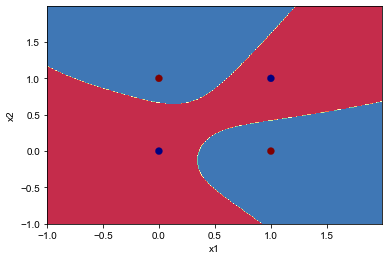

In [34]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x: model.predict(x), X, Y)

In [36]:
outputs = model.predict(X)
outputs

array([0, 1, 1, 0])

In [38]:
np.sum(Y== outputs)/outputs.shape

array([1.])

# Other Datasets

In [39]:
X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)

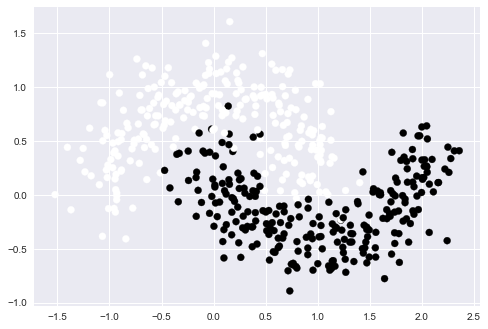

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [41]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

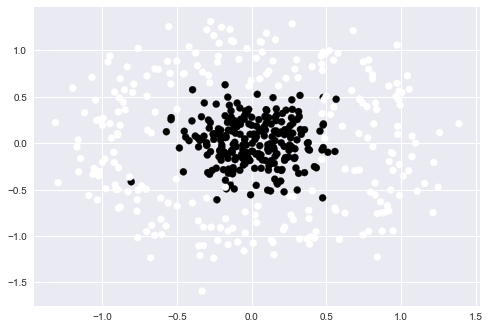

In [42]:
plt.scatter(X[:, 0], X[:, 1], c = Y)